Boxplot of Sleep Quality at Home vs College

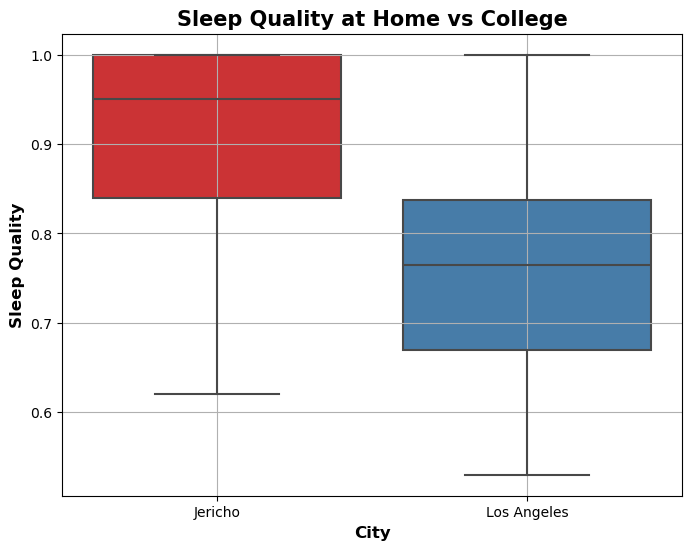

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

data = pd.read_csv("clean_sleepdata.csv", header = 0)

#Plot boxplot using python libraries
plt.figure(figsize=(8, 6))
sns.boxplot(x='City', y='Sleep Quality', data = data, palette='Set1')

#Add Labels
plt.title('Sleep Quality at Home vs College', fontsize = 15, fontweight = 'bold')
plt.xlabel('City', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality', fontsize = 12, fontweight = 'bold')
plt.grid(True)


Scatterplot with sleep quality vs time in bed and time asleep

Calculated r values, spearman rank correlation and p-values between variables

Time in Bed Spearman's Rank Correlation Coefficient: 0.644
Time in Bed P-value: 2.9201308033942853e-13
Statistically significant
Time Asleep Spearman's Rank Correlation Coefficient: 0.474
Time Asleep P-value: 4.935564626565741e-07
Statistically significant


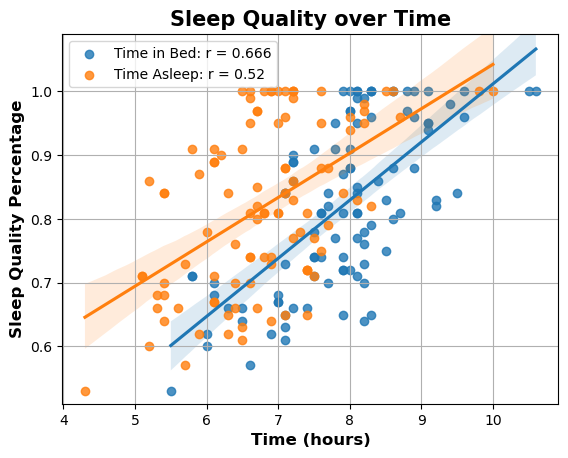

In [5]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr1, p_value1 = spearmanr(data['Time in bed (hrs)'], data['Sleep Quality'])
print(f"Time in Bed Spearman's Rank Correlation Coefficient: {spearman_corr1.round(3)}")
print(f"Time in Bed P-value: {p_value1}")
if p_value1 > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

spearman_corr2, p_value2 = spearmanr(data['Time asleep (hrs)'], data['Sleep Quality'])
print(f"Time Asleep Spearman's Rank Correlation Coefficient: {spearman_corr2.round(3)}")
print(f"Time Asleep P-value: {p_value2}")
if p_value2 > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

#Calculate correlation coefficient to determine strength of linear relationship
r_value1 = data['Time in bed (hrs)'].corr(data['Sleep Quality']).round(3)
r_value2 = data['Time asleep (hrs)'].corr(data['Sleep Quality']).round(3)

sns.regplot(x='Time in bed (hrs)', y='Sleep Quality', data= data, label= f'Time in Bed: r = {r_value1}')
sns.regplot(x='Time asleep (hrs)', y='Sleep Quality', data= data, label= f'Time Asleep: r = {r_value2}')

# Customize labels and title
plt.xlabel('Time (hours)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality over Time', fontsize = 15, fontweight = 'bold')
plt.ylim(.51,1.09)
plt.legend()
plt.grid(True)





Scatterplot with sleep quality vs time to fall asleep

Calculate Spearman Rank Correlation Coefficient and p-value

Time Before Sleep Spearman's Rank Correlation Coefficient: 0.659
Time Before Sleep P-value: 5.2734872114575003e-14
Statistically significant


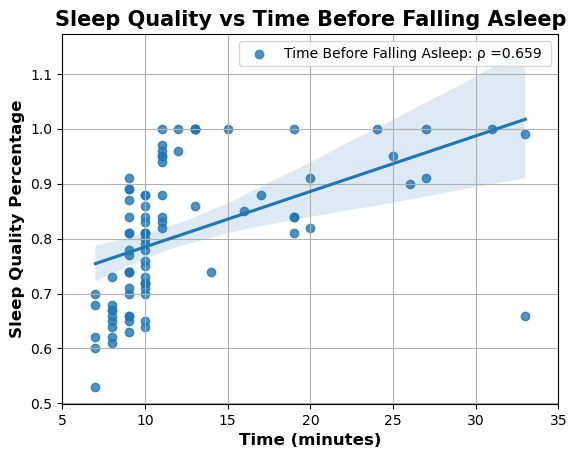

In [25]:
# Determine and remove outliers

Q1 = data['Time before sleep (mins)'].quantile(0.25)
Q3 = data['Time before sleep (mins)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
no_outliers_data = data[(data['Time before sleep (mins)'] >= lower_bound) & (data['Time before sleep (mins)'] <= upper_bound)]

#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Time before sleep (mins)'], data['Sleep Quality'])
print(f"Time Before Sleep Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Time Before Sleep P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

# Scatterplot with sleep quality vs time to fall asleep
sns.regplot(x='Time before sleep (mins)', y='Sleep Quality', data= no_outliers_data, label=f'Time Before Falling Asleep: ρ = {spearman_corr.round(3)}')

# Customize labels and title
plt.xlabel('Time (minutes)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Time Before Falling Asleep', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.xlim(5,35)
plt.grid(True)

Scatterplot with sleep quality vs time snoring

Calculate Spearman Rank Correlation Coefficient and p-value

Time Before Sleep Spearman's Rank Correlation Coefficient: ρ = 0.061
Time Before Sleep P-value: 0.544468010334943
Not statistically significant


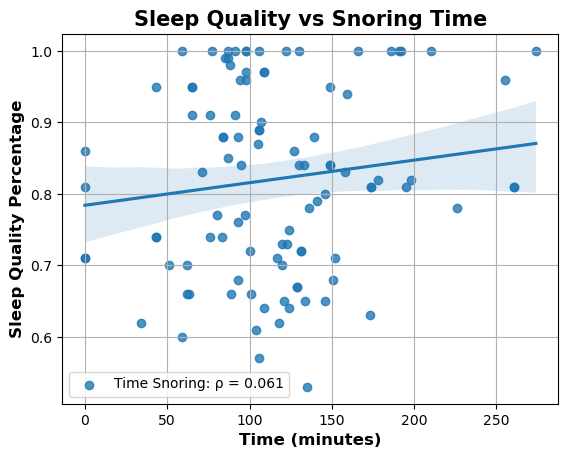

In [26]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Snore time (mins)'], data['Sleep Quality'])
print(f"Time Before Sleep Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Time Before Sleep P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")
    
# Scatterplot with sleep quality vs time snoring
sns.regplot(x='Snore time (mins)', y='Sleep Quality', data= data, label=f'Time Snoring: ρ = {spearman_corr.round(3)}')
plt.xlabel('Time (minutes)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Snoring Time', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(True)

Barplot for Sleep Quality vs Steps

Calculate Spearman Rank Correlation Coefficient and p-value

Steps Spearman's Rank Correlation Coefficient: ρ = -0.299
Steps P-value: 0.002261288942736987
Statistically significant


/tmp/ipykernel_125/950935730.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sleep_quality = data_steps.groupby('Step Range')['Sleep Quality'].mean()


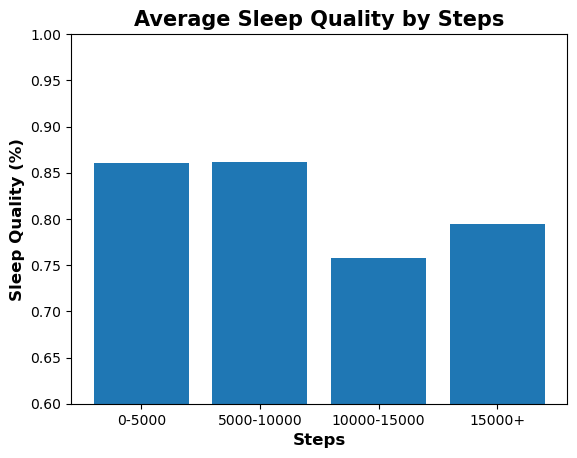

In [4]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Steps'], data['Sleep Quality'])
print(f"Steps Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Steps P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

# Define bins and compute mean sleep quality values
bins = [0, 5000, 10000, 15000, float('inf')]  
labels = ['0-5000', '5000-10000', '10000-15000', '15000+']

data_steps = data.copy()  # Create a copy of df to avoid altering the original

#Cut the data into intervals and calculate mean sleep quality for each interval
data_steps['Step Range'] = pd.cut(data_steps['Steps'], bins=bins, labels=labels, right=False)
mean_sleep_quality = data_steps.groupby('Step Range')['Sleep Quality'].mean()

#Barplot for Sleep Quality vs Steps
plt.bar(mean_sleep_quality.index, mean_sleep_quality.values)
plt.title('Average Sleep Quality by Steps', fontsize = 15, fontweight = 'bold')
plt.xlabel('Steps', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality (%)', fontsize = 12, fontweight = 'bold')
plt.ylim(.6,1)
plt.show()

Scatterplot of Sleep Quality vs Movements per hour

Calculate Spearman Rank Correlation Coefficient and p-value

Movements per hour Spearman's Rank Correlation Coefficient: ρ = -0.629
Movements per hour P-value: 1.5204762377291477e-12
Statistically significant


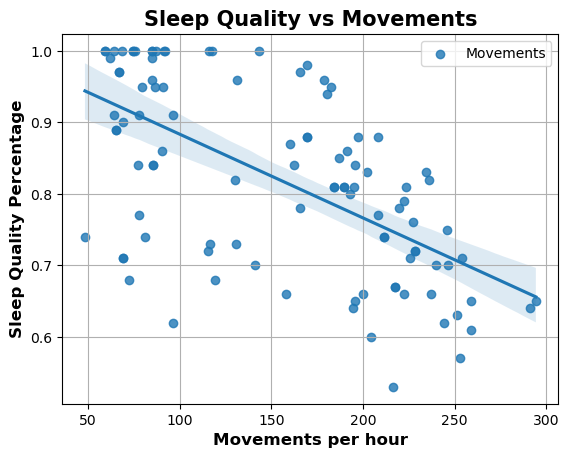

In [30]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Movements per hour'], data['Sleep Quality'])
print(f"Movements per hour Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Movements per hour P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

#Scatterplot of Sleep Quality vs Movements per hour

sns.regplot(x='Movements per hour', y='Sleep Quality', data= data, label='Movements')

plt.xlabel('Movements per hour', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Movements', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(True)

Scatterplot of sleep quality vs weather temperature

Calculate Spearman Rank Correlation Coefficient and p-value

Weather Temperature Spearman's Rank Correlation Coefficient: ρ = 0.548
Weather Temperature P-value: 2.43509686786235e-09
Statistically significant


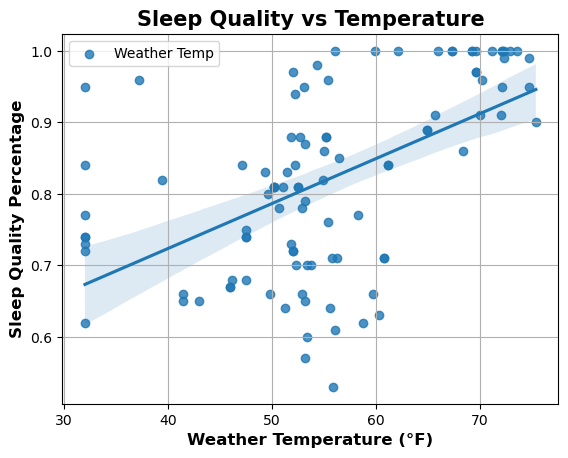

In [32]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Weather temperature (°F)'], data['Sleep Quality'])
print(f"Weather Temperature Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Weather Temperature P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

#Scatterplot of sleep quality vs weather temperature
sns.regplot(x='Weather temperature (°F)', y='Sleep Quality', data= data, label='Weather Temp')
plt.xlabel('Weather Temperature (°F)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Temperature', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(True)

Scatterplot of sleep quality vs regularity

Calculate Spearman Rank Correlation Coefficient and p-value

Regularity Spearman's Rank Correlation Coefficient: ρ = 0.013
Regularity P-value: 0.8989557938585949
Not statistically significant


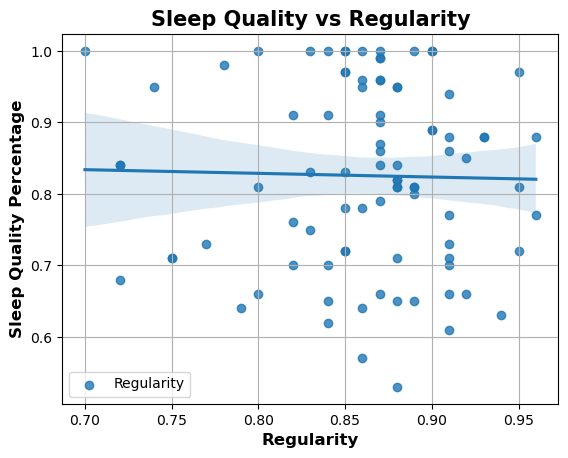

In [33]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Regularity'], data['Sleep Quality'])
print(f"Regularity Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Regularity P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

#Remove outliers
Q1 = data['Regularity'].quantile(0.25)
Q3 = data['Regularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
no_outliers_data = data[(data['Regularity'] >= lower_bound) & (data['Regularity'] <= upper_bound)]


#Scatterplot of sleep quality vs regularity
sns.regplot(x='Regularity', y='Sleep Quality', data= no_outliers_data, label='Regularity')

plt.xlabel('Regularity', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Regularity', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(True)

In [ ]:
Scatterplot of Sleep Quality vs Percent of Time in Bed actually Asleep

Calculate Spearman Rank Correlation Coefficient and p-value

Percent of time in bed actually asleep Spearman's Rank Correlation Coefficient: ρ = -0.165
Percent of time in bed actually asleep P-value: 0.09753637546605345
Not statistically significant


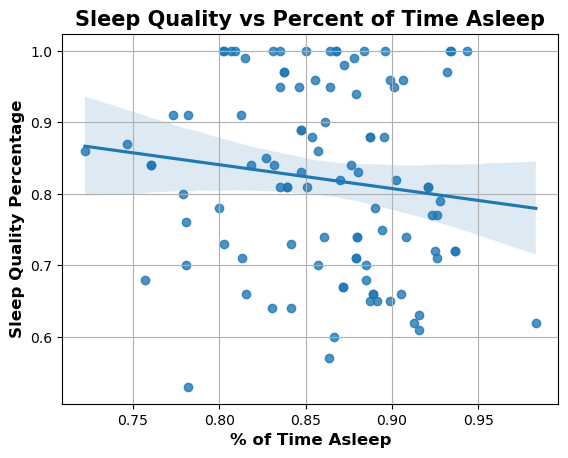

In [35]:
#Add Statistic
data['Percent of time in bed actually asleep'] = data['Time asleep (hrs)'] / data['Time in bed (hrs)']

#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Percent of time in bed actually asleep'], data['Sleep Quality'])
print(f"Percent of time in bed actually asleep Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"Percent of time in bed actually asleep P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")
    
#Scatterplot of Sleep Quality vs Percent of Time in Bed actually Asleep
sns.regplot(x='Percent of time in bed actually asleep', y='Sleep Quality', data= data)
plt.xlabel('% of Time Asleep', fontsize = 12, fontweight = 'bold')
plt.ylabel('Sleep Quality Percentage', fontsize = 12, fontweight = 'bold')
plt.title('Sleep Quality vs Percent of Time Asleep', fontsize = 15, fontweight = 'bold')
plt.grid(True)


Scatterplot of Snoring vs Percent of Time in Bed actually Asleep

Calculate Spearman Rank Correlation Coefficient and p-value

Spearman's Rank Correlation Coefficient: ρ = 0.003
P-value: 0.9780131578657392
Not statistically significant


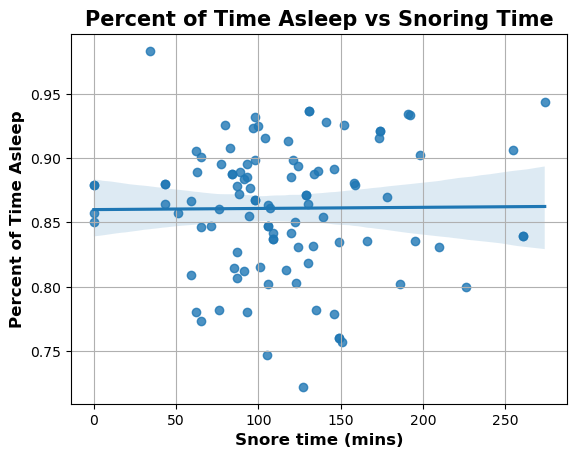

In [36]:
#Add Statistic
data['Percent of time in bed actually asleep'] = data['Time asleep (hrs)'] / data['Time in bed (hrs)']

#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Snore time (mins)'], data['Percent of time in bed actually asleep'])
print(f"Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")

#Scatterplot of Snoring vs Percent of Time in Bed actually Asleep
sns.regplot(x='Snore time (mins)', y='Percent of time in bed actually asleep', data= data)
plt.xlabel('Snore time (mins)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Percent of Time Asleep', fontsize = 12, fontweight = 'bold')
plt.title('Percent of Time Asleep vs Snoring Time', fontsize = 15, fontweight = 'bold')
plt.grid(True)

Scatterplot of Snoring vs Steps

Calculate Spearman Rank Correlation Coefficient and p-value

Spearman's Rank Correlation Coefficient: ρ = 0.465
P-value: 8.428002220138593e-07
Statistically significant


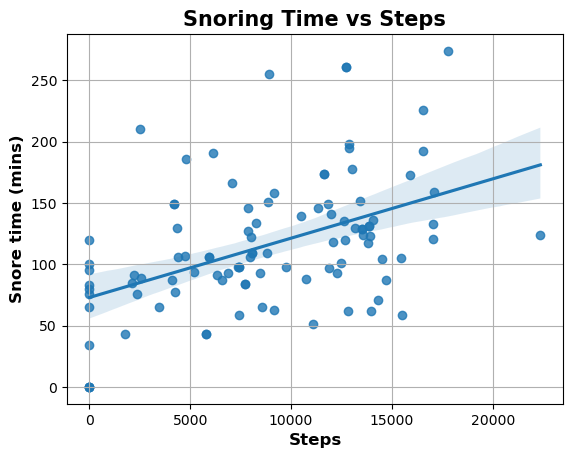

In [37]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Snore time (mins)'], data['Steps'])
print(f"Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")
    
#Scatterplot of Snoring vs Steps
sns.regplot(x='Steps', y='Snore time (mins)', data= data)
plt.xlabel('Steps', fontsize = 12, fontweight = 'bold')
plt.ylabel('Snore time (mins)', fontsize = 12, fontweight = 'bold')
plt.title('Snoring Time vs Steps', fontsize = 15, fontweight = 'bold')
plt.grid(True)

Scatterplot of Snoring vs Regularity

Calculate Spearman Rank Correlation Coefficient and p-value

Spearman's Rank Correlation Coefficient: ρ = 0.11
P-value: 0.2691674537566523
Not statistically significant


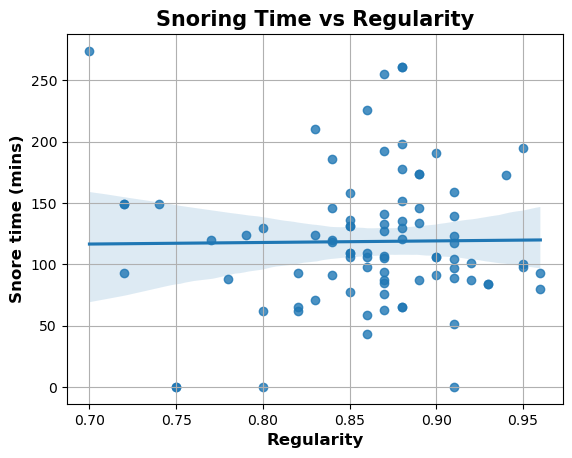

In [38]:
#Calculate Spearman Rank Correlation Coefficient and p-value to determine strength of monotonic relationship[-1,1] and if statistically significant (p<.05)
spearman_corr, p_value = spearmanr(data['Snore time (mins)'], data['Regularity'])
print(f"Spearman's Rank Correlation Coefficient: ρ = {spearman_corr.round(3)}")
print(f"P-value: {p_value}")
if p_value > .05:
    print("Not statistically significant")
else:
    print("Statistically significant")
    
#Remove Outliers
Q1 = data['Regularity'].quantile(0.25)
Q3 = data['Regularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
no_outliers_data = data[(data['Regularity'] >= lower_bound) & (data['Regularity'] <= upper_bound)]

#Scatterplot of Snoring vs Regularity
sns.regplot(x='Regularity', y='Snore time (mins)', data= no_outliers_data)
plt.xlabel('Regularity', fontsize = 12, fontweight = 'bold')
plt.ylabel('Snore time (mins)', fontsize = 12, fontweight = 'bold')
plt.title('Snoring Time vs Regularity', fontsize = 15, fontweight = 'bold')
plt.grid(True)